# Optimize feature_combination


# letter

In [3]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits

import openml
from rerf.rerfClassifier import rerfClassifier
from sklearn.model_selection import KFold

# get some data
task_id = 6 #letter
openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'
benchmark_suite = openml.study.get_suite('OpenML-CC18')
task = openml.tasks.get_task(task_id)
X, y = task.get_X_and_y()


In [4]:
# build a classifier
clf = rerfClassifier(n_estimators=100)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"feature_combinations": [1,2,3,4,5]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV took 374.06 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.967 (std: 0.003)
Parameters: {'feature_combinations': 3}

Model with rank: 2
Mean validation score: 0.967 (std: 0.004)
Parameters: {'feature_combinations': 1}

Model with rank: 3
Mean validation score: 0.966 (std: 0.003)
Parameters: {'feature_combinations': 2}



In [14]:
random_search.cv_results_

{'mean_fit_time': array([ 6.95003166,  8.71380935, 10.67128987, 16.53882613, 18.90900826]),
 'std_fit_time': array([0.19383065, 0.2445438 , 0.01163628, 1.70139803, 1.08024596]),
 'mean_score_time': array([0.22166543, 0.2465097 , 0.28311844, 0.54449978, 0.59117389]),
 'std_score_time': array([0.00958569, 0.00685667, 0.0080724 , 0.12516745, 0.20713825]),
 'param_feature_combinations': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'feature_combinations': 1},
  {'feature_combinations': 2},
  {'feature_combinations': 3},
  {'feature_combinations': 4},
  {'feature_combinations': 5}],
 'split0_test_score': array([0.96783844, 0.96509599, 0.9670905 , 0.96634256, 0.96459736]),
 'split1_test_score': array([0.96355467, 0.96630055, 0.96704943, 0.96704943, 0.96630055]),
 'split2_test_score': array([0.96251874, 0.96501749, 0.96301849, 0.96376812, 0.96226887]),
 'split3_test_score': array([0.9

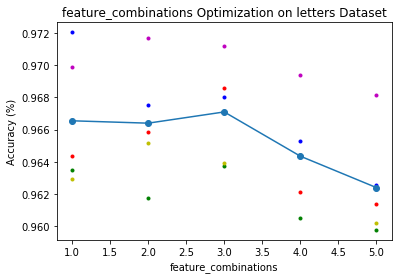

In [6]:
import matplotlib.pyplot as plt

param_values= []
for i in random_search.cv_results_['params']:
    for j in i:
        value = i.get(j)
        param_values.append(value)

plt.plot (param_values, random_search.cv_results_['split0_test_score'], 'r.', 
        param_values, random_search.cv_results_['split1_test_score'], 'b.',
        param_values, random_search.cv_results_['split2_test_score'], 'g.',
        param_values, random_search.cv_results_['split3_test_score'], 'y.',
        param_values, random_search.cv_results_['split4_test_score'], 'm.',
        param_values, random_search.cv_results_['mean_test_score'], '-o')
plt.ylabel('Accuracy (%)')
plt.xlabel('feature_combinations')
plt.title('feature_combinations Optimization on letters Dataset')
plt.show()


# kc2

RandomizedSearchCV took 4.40 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.814 (std: 0.076)
Parameters: {'feature_combinations': 2}

Model with rank: 2
Mean validation score: 0.801 (std: 0.085)
Parameters: {'feature_combinations': 5}

Model with rank: 3
Mean validation score: 0.799 (std: 0.075)
Parameters: {'feature_combinations': 3}



TypeError: title() missing 1 required positional argument: 'label'

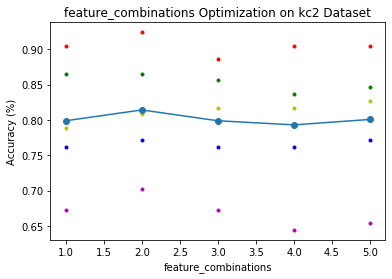

In [7]:
# get some data
task_id = 3913 #kc2
openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'
benchmark_suite = openml.study.get_suite('OpenML-CC18')
task = openml.tasks.get_task(task_id)
X, y = task.get_X_and_y()

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

param_values= []
for i in random_search.cv_results_['params']:
    for j in i:
        value = i.get(j)
        param_values.append(value)

plt.plot (param_values, random_search.cv_results_['split0_test_score'], 'r.', 
        param_values, random_search.cv_results_['split1_test_score'], 'b.',
        param_values, random_search.cv_results_['split2_test_score'], 'g.',
        param_values, random_search.cv_results_['split3_test_score'], 'y.',
        param_values, random_search.cv_results_['split4_test_score'], 'm.',
        param_values, random_search.cv_results_['mean_test_score'], '-o')
plt.ylabel('Accuracy (%)')
plt.xlabel('feature_combinations')
plt.title('feature_combinations Optimization on kc2 Dataset')
plt.title()
plt.show()

RandomizedSearchCV took 17.04 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.905 (std: 0.008)
Parameters: {'feature_combinations': 4}

Model with rank: 2
Mean validation score: 0.904 (std: 0.006)
Parameters: {'feature_combinations': 3}

Model with rank: 3
Mean validation score: 0.903 (std: 0.006)
Parameters: {'feature_combinations': 1}



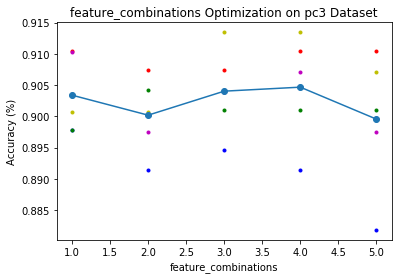

In [10]:
# get some data
task_id = 3903 #pc3
openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'
benchmark_suite = openml.study.get_suite('OpenML-CC18')
task = openml.tasks.get_task(task_id)
X, y = task.get_X_and_y()

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


param_values= []
for i in random_search.cv_results_['params']:
    for j in i:
        value = i.get(j)
        param_values.append(value)

plt.plot (param_values, random_search.cv_results_['split0_test_score'], 'r.', 
        param_values, random_search.cv_results_['split1_test_score'], 'b.',
        param_values, random_search.cv_results_['split2_test_score'], 'g.',
        param_values, random_search.cv_results_['split3_test_score'], 'y.',
        param_values, random_search.cv_results_['split4_test_score'], 'm.',
        param_values, random_search.cv_results_['mean_test_score'], '-o')
plt.ylabel('Accuracy (%)')
plt.xlabel('feature_combinations')
plt.title('feature_combinations Optimization on pc3 Dataset')
plt.show()

In [79]:
# get some data
task_id = 37 #diabetes
openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'
benchmark_suite = openml.study.get_suite('OpenML-CC18')
task = openml.tasks.get_task(task_id)
X, y = task.get_X_and_y()

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)



RandomizedSearchCV took 4.80 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.771 (std: 0.034)
Parameters: {'feature_combinations': 2}

Model with rank: 2
Mean validation score: 0.753 (std: 0.048)
Parameters: {'feature_combinations': 5}

Model with rank: 3
Mean validation score: 0.753 (std: 0.038)
Parameters: {'feature_combinations': 4}



RandomizedSearchCV took 8.22 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.853 (std: 0.045)
Parameters: {'feature_combinations': 4}

Model with rank: 2
Mean validation score: 0.852 (std: 0.055)
Parameters: {'feature_combinations': 5}

Model with rank: 3
Mean validation score: 0.849 (std: 0.041)
Parameters: {'feature_combinations': 2}



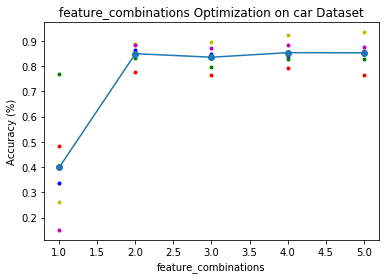

In [11]:
# get some data
task_id = 146821 #car
openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'
benchmark_suite = openml.study.get_suite('OpenML-CC18')
task = openml.tasks.get_task(task_id)
X, y = task.get_X_and_y()

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


param_values= []
for i in random_search.cv_results_['params']:
    for j in i:
        value = i.get(j)
        param_values.append(value)

plt.plot (param_values, random_search.cv_results_['split0_test_score'], 'r.', 
        param_values, random_search.cv_results_['split1_test_score'], 'b.',
        param_values, random_search.cv_results_['split2_test_score'], 'g.',
        param_values, random_search.cv_results_['split3_test_score'], 'y.',
        param_values, random_search.cv_results_['split4_test_score'], 'm.',
        param_values, random_search.cv_results_['mean_test_score'], '-o')
plt.ylabel('Accuracy (%)')
plt.xlabel('feature_combinations')
plt.title('feature_combinations Optimization on car Dataset')
plt.show()